In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

np.random.seed(71)

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

In [2]:
R = pd.read_csv("../data/R.csv")

DB5P1 = pd.read_csv("../data/DB5.csv")
DB2P8 = pd.read_csv("../data/DB2P8.csv")

DB5 = DB5P1[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB5["id"] = DB5P1["id"]

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

data = DB5.copy()

In [3]:
def compute_OLS_regression(data):
    # Adding a column for the intercept
    _df = data[coeffs]; _df.insert(
        loc = 0, 
        column = "intercept", 
        value = np.ones(len(_df))
    )
    X = _df.to_numpy()
    Y = data[["TAUTH"]].to_numpy()
    model = sm.OLS(Y,X)
    regression = model.fit()
    return regression
    
regression = compute_OLS_regression(data)
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:52:53   Log-Likelihood:                 1140.9
No. Observations:                6250   AIC:                            -2264.
Df Residuals:                    6241   BIC:                            -2203.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5185      0.029    -88.236      0.000      -2.574      -2.463
x1             1.1343      0.016     69.337      0.000       1.102       1.166
x2             0.0724      0.014      5.076      0.000       0.044       0.100
x3             0.1749      0.010     18.246      0.000       0.156       0.194
x4            -0.6827      0.007   -100.092      0.000      -0.696      -0.669
x5             1.4480      0.026     56.745      0.000       1.398       1.498
x6             0.2802      0.029      9.726      0.000       0.224       0.337
x7             0.0636      0.037      1.721      0.085      -0.009       0.136
x8             0.2140      0.017     12.538      0.000       0.181       0.247
==============================================================================
Omnibus:                      103.850   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.017
Skew:                          -0.148   Prob(JB):                     1.21e-37
Kurtosis:                       3.752   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Multiplication Factor 
γ = 100
# Re-scal=ed Covariance Matrix
COVM = pd.DataFrame(γ * regression.cov_params(), 
                    columns= ["intercept"] + coeffs, 
                    index  = ["intercept"] + coeffs
                   )
COVM

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
intercept,0.081470,-0.006213,0.017640,-0.004058,-0.004046,0.009079,-0.011518,0.058950,-0.018026
IP,-0.006213,0.026763,-0.016536,-0.005552,0.000189,-0.034605,-0.025154,-0.050333,-0.000457
BT,0.017640,-0.016536,0.020326,0.000742,-0.002162,0.019989,0.023099,0.041455,-0.004041
NEL,-0.004058,-0.005552,0.000742,0.009191,-0.002711,0.015865,0.001103,0.014157,-0.002343
PLTH,-0.004046,0.000189,-0.002162,-0.002711,0.004652,-0.007419,-0.005033,-0.007224,0.000873
RGEO,0.009079,-0.034605,0.019989,0.015865,-0.007419,0.065112,0.031308,0.077594,-0.000990
KAREA,-0.011518,-0.025154,0.023099,0.001103,-0.005033,0.031308,0.082974,0.039296,-0.007695
EPS,0.058950,-0.050333,0.041455,0.014157,-0.007224,0.077594,0.039296,0.136531,-0.007435
MEFF,-0.018026,-0.000457,-0.004041,-0.002343,0.000873,-0.000990,-0.007695,-0.007435,0.029133


In [5]:
MEAN = pd.DataFrame(regression.params).T; MEAN.columns = columns = ["intercept"] + coeffs
MEAN

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.518511,1.13432,0.072368,0.174924,-0.68271,1.447975,0.280173,0.063607,0.214009


In [6]:
N = 10 #4000
def get_rand_sample(μ, σ, N):
    s = np.random.normal(μ, σ, N)
    return s

In [7]:
params = ["intercept"] + coeffs
M = np.zeros((N, len(params)))

for i, parameter in enumerate(params):
    mu, sigma = MEAN[parameter][0], np.sqrt( COVM[parameter][parameter] )
    M[:, i] = get_rand_sample(mu, sigma, N)
    
PARAM_SAMPLING = pd.DataFrame(M, columns=params)    

In [8]:
PARAM_SAMPLING

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.641418,1.081478,0.049453,0.281890,-0.671799,1.230755,0.292325,-0.099739,0.259199
1,-2.859294,1.365466,0.111504,0.070586,-0.605545,1.371779,0.330956,0.207910,0.134713
2,-2.645328,1.017734,0.019084,0.178991,-0.677614,1.489649,0.031294,0.173472,0.181358
3,-2.378818,0.911472,0.168387,0.236412,-0.738472,1.688024,0.583139,0.200659,0.221048
4,-2.647399,0.855232,-0.024480,0.325746,-0.634356,1.548592,0.203214,0.150490,0.329388
5,-2.351336,1.225502,-0.008709,-0.012611,-0.782017,1.677797,0.630926,0.638018,0.412196
6,-2.182469,1.122454,0.064863,0.141010,-0.718007,1.159748,0.403870,0.462639,0.258804
7,-2.793954,1.103124,-0.088687,0.317241,-0.710486,1.314115,0.084241,0.363268,0.204565
8,-2.456208,1.324373,0.199508,0.271729,-0.651599,1.642696,0.448133,0.781537,0.113332
9,-2.765735,0.891860,0.181701,0.277891,-0.686046,1.316445,0.441689,0.217247,0.060888


In [9]:
def get_hat_τ(X, parameters):
    I, B, n_e, P, R, κ, ε, M_eff = X 
    α0, αI, αB, αn, αP, αR, ακ, αε, αM_eff = parameters
    hat_τ = α0 + αI*I + αB*B + αn*n_e + αP*P + αR*R + ακ*κ + αε*ε + αM_eff*M_eff 
    return hat_τ

In [10]:
data_ = DB5.copy()
data_

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id
0,-2.975930,-1.217734,0.790728,1.332102,0.625938,0.527093,-0.025523,-1.418447,0.405465,HDULEH
1,-3.015527,-1.220102,0.790728,1.317480,0.705076,0.521172,-0.027988,-1.409604,0.405465,NAC6N1
2,-2.752786,-1.213686,0.790728,1.226712,0.123986,0.526502,-0.010556,-1.432100,0.405465,U2T1C7
3,-2.660547,-1.217734,0.790728,1.328400,0.319181,0.526502,-0.025933,-1.417369,0.405465,422XQB
4,-2.965979,-1.223495,0.790274,1.347294,0.709513,0.521766,-0.031387,-1.406800,0.405465,WZ9FED
...,...,...,...,...,...,...,...,...,...,...
6245,-4.094745,-1.515037,0.674474,1.593105,-0.486946,-0.189467,0.102557,-1.347185,0.693147,NGC85H
6246,-4.068677,-1.514582,0.668854,1.631004,-0.452871,-0.179605,0.096219,-1.354725,0.693147,ID1IP4
6247,-3.671826,-1.515037,0.668342,1.674664,-0.977634,-0.180324,0.098034,-1.355399,0.693147,K19A5H
6248,-1.753886,-0.020815,1.567574,1.252763,1.631591,0.897719,-0.000300,-1.116746,0.693147,D26CA1


In [11]:
for p in range(len(PARAM_SAMPLING)):
    data_[f"τ_{p}"] = np.zeros(len(DB5))
    for observation in range(len(DB5)):
        data_.iloc[observation, len(data_.columns) - 1] = get_hat_τ(
            data_.loc[observation].loc[coeffs].values,
            PARAM_SAMPLING.loc[p].values
        )

In [12]:
hat_τ = data_[data_.columns[len(params) + 1:]]
residuals = hat_τ.sub( data_["TAUTH"], axis=0 )
abs_relative_residual = (residuals.div( data_["TAUTH"], axis=0 )).apply( np.abs )

In [13]:
data_[["TAUTH"] + list(hat_τ.columns)]

,TAUTH,τ_0,τ_1,τ_2,τ_3,τ_4,τ_5,τ_6,τ_7,τ_8,τ_9
0,-2.975930,-3.076433,-4.244585,-3.443419,-2.823049,-2.940184,-4.226464,-3.709925,-3.971339,-4.165277,-3.368199
1,-3.015527,-3.145170,-4.303872,-3.509434,-2.896763,-3.005513,-4.296916,-3.775238,-4.039592,-4.227872,-3.435629
2,-2.752786,-2.759543,-3.941238,-3.120813,-2.468606,-2.652564,-3.827898,-3.360795,-3.648153,-3.866416,-3.046646
3,-2.660547,-2.872351,-4.059812,-3.236923,-2.598412,-2.747632,-3.987089,-3.490545,-3.754985,-3.966711,-3.159502
4,-2.965979,-3.143982,-4.308866,-3.509301,-2.896578,-3.000856,-4.304276,-3.777445,-4.035477,-4.225603,-3.433607
...,...,...,...,...,...,...,...,...,...,...,...
6245,-4.094745,-3.359510,-4.858182,-3.946267,-3.287061,-3.378763,-4.680179,-3.887192,-4.261617,-4.817531,-3.672197
6246,-4.068677,-3.360467,-4.866284,-3.949034,-3.292359,-3.374658,-4.698961,-3.900778,-4.263117,-4.822488,-3.677113
6247,-3.671826,-2.996428,-4.546637,-3.587235,-2.895304,-3.028771,-4.290181,-3.518794,-3.877922,-4.470287,-3.305757
6248,-1.753886,-1.933537,-2.519933,-2.248692,-1.598217,-1.880107,-2.603018,-2.395251,-2.801938,-2.213439,-2.289423


In [14]:
abs_relative_residual

,τ_0,τ_1,τ_2,τ_3,τ_4,τ_5,τ_6,τ_7,τ_8,τ_9
0,0.033772,0.426306,0.157090,0.051372,0.012012,0.420216,0.246644,0.334487,0.399656,0.131814
1,0.042992,0.427237,0.163788,0.039384,0.003321,0.424930,0.251933,0.339597,0.402034,0.139313
2,0.002455,0.431727,0.133692,0.103233,0.036407,0.390554,0.220870,0.325258,0.404546,0.106750
3,0.079610,0.525932,0.216638,0.023354,0.032732,0.498598,0.311965,0.411358,0.490938,0.187539
4,0.060015,0.452763,0.183185,0.023399,0.011759,0.451216,0.273591,0.360588,0.424691,0.157664
...,...,...,...,...,...,...,...,...,...,...
6245,0.179556,0.186443,0.036260,0.197249,0.174854,0.142972,0.050688,0.040753,0.176516,0.103193
6246,0.174064,0.196036,0.029406,0.190804,0.170576,0.154911,0.041266,0.047790,0.185272,0.096239
6247,0.183941,0.238250,0.023038,0.211481,0.175132,0.168405,0.041677,0.056129,0.217456,0.099697
6248,0.102430,0.436771,0.282120,0.088757,0.071967,0.484143,0.365683,0.597560,0.262020,0.305343


In [15]:
MDAPE = abs_relative_residual.median(axis=0)
MDAPE

τ_0    0.091544
τ_1    0.273538
τ_2    0.185880
τ_3    0.158260
τ_4    0.095014
τ_5    0.298909
τ_6    0.201949
τ_7    0.367142
τ_8    0.144728
τ_9    0.169060
dtype: float64

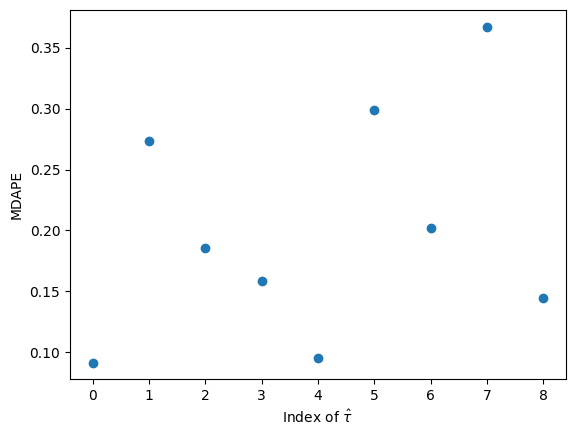

In [21]:
plt.scatter(list(range(len(MDAPE)-1)), MDAPE.values[:-1])
plt.xlabel("Index of $\\hat{\\tau}$")
plt.ylabel("MDAPE");

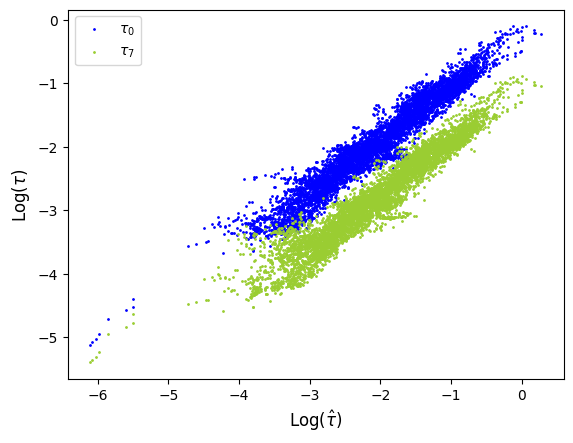

In [23]:
plt.scatter(data_["TAUTH"], data_["τ_0"], s=1, c="b", label = "$\\tau_0$")
plt.scatter(data_["TAUTH"], data_["τ_7"], s=1, c="yellowgreen", label = "$\\tau_7$")
plt.xlabel("Log($\\hat{\\tau}$)", fontsize=12)
plt.ylabel("Log($\\tau$)", fontsize=12)
plt.legend(frameon=True);

In [18]:
len(DB5) - 6233

17

In [19]:
len(R)

4942